# Dynamic height from TS observation

In [1]:
import numpy as np
import gsw
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# get T,S data from World Ocean Atlas
# read in netCDF
df=xr.open_dataset('woa18_decav_t00_01.nc',decode_times=False)
dfs=xr.open_dataset('woa18_decav_s00_01.nc',decode_times=False)
df

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [3]:
lat=df['lat'].to_numpy()
lon=df['lon'].to_numpy()
lev=df['depth'].to_numpy()
temp=df['t_an'].isel(time=0)
salt=dfs['s_an'].isel(time=0)

In [4]:
# set up LONG, LAT and P in 3D array
xm,ym=np.meshgrid(lon,lat)
LONG=np.repeat(xm[None,:,:],102,axis=0) # create a 3D array by repeating x and y
LAT=np.repeat(ym[None,:,:],102,axis=0) # create a 3D array by repeating x and y
lev2=np.repeat(lev[:,None],180,axis=1)
P=np.repeat(lev2[:,:,None],360,axis=2) # create a 3D array by repeating z

In [5]:
# calculate SA and CT
sa=gsw.SA_from_SP(salt,P,LONG,LAT)
ct=gsw.CT_from_t(sa,temp,P)

In [6]:
# calculate dynamic height (geopotential = gZ) wrt 2000 dbar 
gZ = gsw.geo_strf_dyn_height(sa,ct,P,2000)
Z = gZ/9.8

In [7]:
print('printing vertical levels (pressure/depth)')
print(lev)

printing vertical levels (pressure/depth)
[0.00e+00 5.00e+00 1.00e+01 1.50e+01 2.00e+01 2.50e+01 3.00e+01 3.50e+01
 4.00e+01 4.50e+01 5.00e+01 5.50e+01 6.00e+01 6.50e+01 7.00e+01 7.50e+01
 8.00e+01 8.50e+01 9.00e+01 9.50e+01 1.00e+02 1.25e+02 1.50e+02 1.75e+02
 2.00e+02 2.25e+02 2.50e+02 2.75e+02 3.00e+02 3.25e+02 3.50e+02 3.75e+02
 4.00e+02 4.25e+02 4.50e+02 4.75e+02 5.00e+02 5.50e+02 6.00e+02 6.50e+02
 7.00e+02 7.50e+02 8.00e+02 8.50e+02 9.00e+02 9.50e+02 1.00e+03 1.05e+03
 1.10e+03 1.15e+03 1.20e+03 1.25e+03 1.30e+03 1.35e+03 1.40e+03 1.45e+03
 1.50e+03 1.55e+03 1.60e+03 1.65e+03 1.70e+03 1.75e+03 1.80e+03 1.85e+03
 1.90e+03 1.95e+03 2.00e+03 2.10e+03 2.20e+03 2.30e+03 2.40e+03 2.50e+03
 2.60e+03 2.70e+03 2.80e+03 2.90e+03 3.00e+03 3.10e+03 3.20e+03 3.30e+03
 3.40e+03 3.50e+03 3.60e+03 3.70e+03 3.80e+03 3.90e+03 4.00e+03 4.10e+03
 4.20e+03 4.30e+03 4.40e+03 4.50e+03 4.60e+03 4.70e+03 4.80e+03 4.90e+03
 5.00e+03 5.10e+03 5.20e+03 5.30e+03 5.40e+03 5.50e+03]


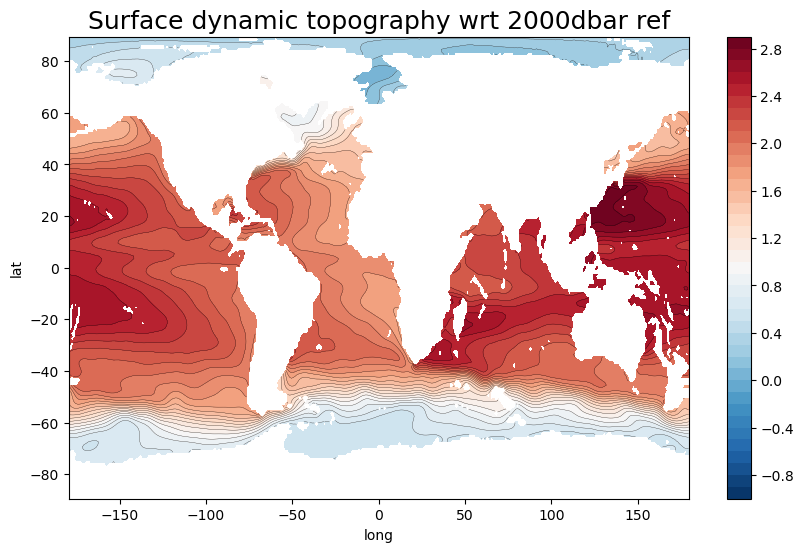

In [8]:
# plot surface dynamic height wrt 2000 dbar
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
plt.contourf(xm,ym,Z[0,:,:],cnt,cmap='RdBu_r')
plt.colorbar()
plt.contour(xm,ym,Z[0,:,:],cnt,linestyles='solid',colors='k',linewidths=.2)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Surface dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()

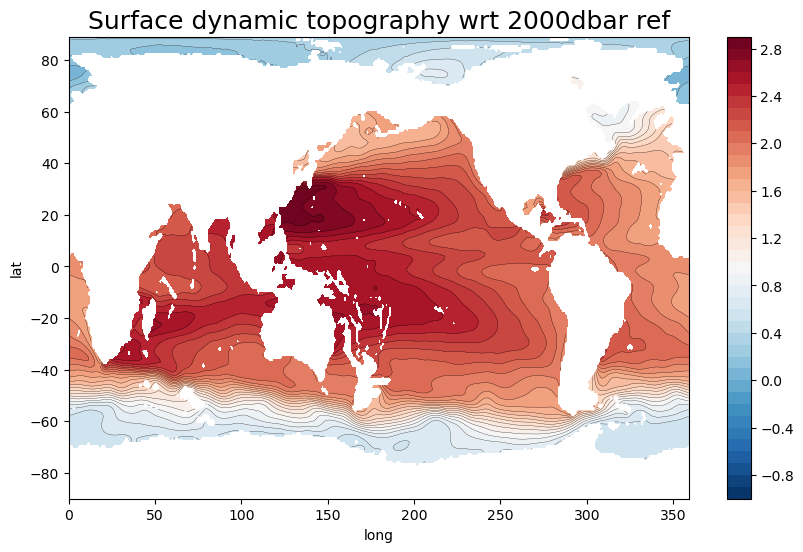

In [9]:
# rotate the x axis to center in the dateline
Z0 = np.roll(Z[0,:,:],180,axis=1)
xm0=np.arange(0,360,1)
ym0=np.arange(-90,90,1)
#
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
plt.contourf(xm0,ym0,Z0,cnt,cmap='RdBu_r')
plt.colorbar()
plt.contour(xm0,ym0,Z0,cnt,linestyles='solid',colors='k',linewidths=.2)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Surface dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()

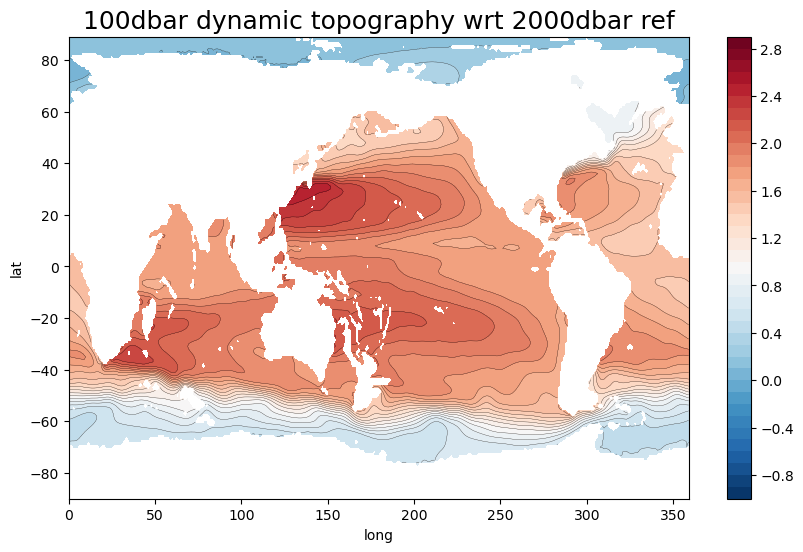

In [10]:
# now plot 100dbar level dynamic height wrt 2000 dbar
ind=np.where(lev==100)
# 
Zk = np.roll(Z[ind[0][0],:,:],180,axis=1)
#
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
plt.contourf(xm0,ym0,Zk,cnt,cmap='RdBu_r')
plt.colorbar()
plt.contour(xm0,ym0,Zk,cnt,linestyles='solid',colors='k',linewidths=.2)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('100dbar dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()

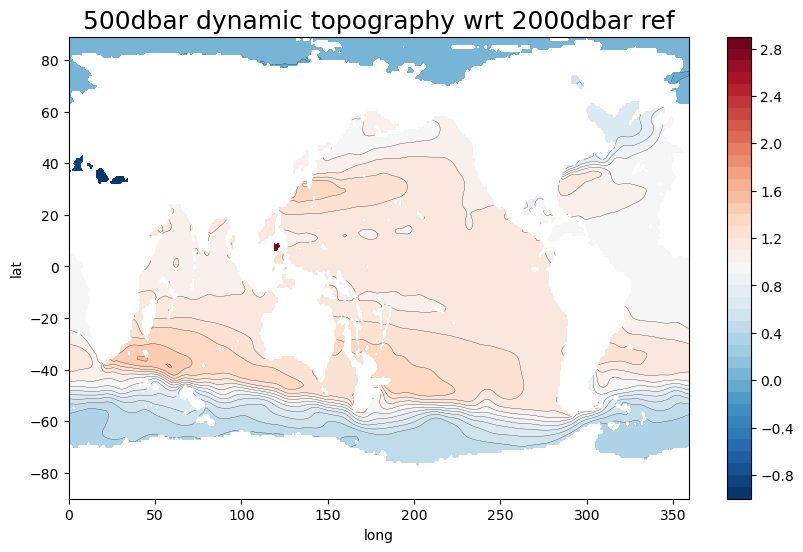

In [11]:
# now plot 500dbar level dynamic height wrt 2000 dbar
ind=np.where(lev==500)
# 
Zk = np.roll(Z[ind[0][0],:,:],180,axis=1)
#
plt.figure(figsize=(10,6))
cnt=np.arange(-1,3,.1)
plt.contourf(xm0,ym0,Zk,cnt,cmap='RdBu_r')
plt.colorbar()
plt.contour(xm0,ym0,Zk,cnt,linestyles='solid',colors='k',linewidths=.2)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('500dbar dynamic topography wrt 2000dbar ref',fontsize=18)
plt.show()